In [3]:
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['font.family'] = 'monospace'  # Set the text font

import plot_utils as pu
from main import Spectrogram

In [31]:
path_audio = 'songs/bach_A_minor.mp3'

Spec = Spectrogram(path_audio)

# Set the frequency range (notes or frequency values)
Spec.set_freq_range('C#4', 'F#6')

# Set the window size of the spectrogram
window_size = 0.2  # seconds
Spec.make_spectrogram(window_size)

Spec.set_title(title='Partita A Minor - J. S. Bach', modify='d0.5')
Spec.set_xticks(modify='d0.1')
Spec.set_yticks(modify='d0.5')

Spec.set_plot_params(
                    ratio=16/9,
                    number_lines=200,
                     facecolor='#eaebcc', 
                     cmap1=('binary_r', 0.0, 0.8), 
                     cmap2=('twilight', 0.3, 0.7), 
                     linewidth=0.055,
                     y_max=1.1,
                     fig_size=1920,
                     color_spectra_power=5)

savepath = 'Bach_A_minor_2.png'

Spec.plot(savepath=savepath)

In [38]:
path_audio = 'songs/bach_A_minor.mp3'

Spec = Spectrogram(path_audio)

# Set the frequency range (notes or frequency values)
Spec.set_freq_range('C4', 'F#6')

# Set the window size of the spectrogram
window_size = 0.3  # seconds
Spec.make_spectrogram(window_size, moving_average=12)

Spec.set_title(title='Partita A Minor - J. S. Bach', modify='d0.5')
Spec.set_xticks(label_size=1.1, modify='d0.1', key='A_minor')
Spec.set_yticks(modify='d0.5')

Spec.set_plot_params(
                    ratio=0.9*16/9,
                    number_lines=194,
                     facecolor='#eaebcc', 
                     cmap1=('binary_r', 0.0, 0.8), 
                     cmap2=('twilight', 0.3, 0.7), 
                     linewidth=0.055,
                     y_max=1.1,
                     fig_size=1920,
                     color_spectra_power=5)

savefolder='figures/bach_a_minor/pngs/'

#Spec.plot()

Spec.plot_frames(savefolder=savefolder)

In [35]:
alpha_ = 1.1
alpha_ = min(alpha_, 1)
alpha_

1

In [15]:
fps = 200/58.2

In [17]:
savefolder='figures/bach_a_minor/pngs'

pu.png_to_mp4(savefolder, extension='.jpg', fps=fps)

path_audio = 'songs/bach_A_minor.mp3'
path_video = 'figures/bach_a_minor/video.mp4'
path_output = 'figures/bach_a_minor/video_with_audio.mp4'

pu.add_audio_to_video(path_video, path_audio, path_output)

Video with audio added successfully: figures/bach_a_minor/video_with_audio.mp4


In [7]:
Spec.set_freq_range('B3', 'A6')
# Spec.trim_audio(0, 59)
bin_size = 0.1
frequency_resolution = 100
Spec.make_spectrogram(bin_size, frequency_resolution=frequency_resolution)

In [10]:
10/Spec.dt

441000.0

In [ ]:




bin_size = 0.05
Spec.make_spectrogram(bin_size)

spec = Spec.spec    
x_f = Spec.x_f

In [458]:
with open('data/chromatic_scale.json') as f:
    chromatic_scale = json.load(f)
x_min = chromatic_scale["B3"]
x_max = chromatic_scale["A6"]

path_audio = 'songs/partita_A_minor.mp3'

audio = AudioSegment.from_file(path_audio, format="mp3")

sf = audio.frame_rate
audio_data = np.mean(np.array(audio.get_array_of_samples()).reshape((-1, 2)), axis=1)


dt = 1.0 / sf

sec_i, sec_f = 0, 59
audio_data = audio_data[int(sec_i / dt) : int(sec_f / dt)]





bin_size = 0.2

N = int(bin_size // dt)  # Number of data points per bin 
M = int(len(audio_data) // N)  # Number of bins in the spectrogram

x_f = sp.fft.fftfreq(N, dt)[: N // 2]

x_f_trimmed = x_f[(x_f>x_min) & (x_f<x_max)]

audio_data = audio_data[:int(M * N)]
audio_data_arr = audio_data.reshape((M, N))

def power_spectrum(audio_data):
    f = (2.0 / (N // 2)) * np.abs(sp.fft.fft(audio_data)[: N // 2])[(x_f>x_min) & (x_f<x_max)]
    return f

k = 50
xx = [np.linspace(0, 1, k)]  # Start with the initial linspace
xx += [np.linspace(2**i, 2**(i+1), k) for i in range(11)]  # Append other ranges
xx = np.concatenate(xx)

win = k//10

def interpolate(f):
    result = np.interp(xx, x_f_trimmed, f)
    return result

def moving_average(a, n=win):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n



spec = np.apply_along_axis(power_spectrum, 1, audio_data_arr)
spec = np.apply_along_axis(interpolate, 1, spec)
spec = np.apply_along_axis(moving_average, 1, spec)

xx = xx[win // 2 - 1 : -win // 2]

# spec_max = np.apply_along_axis(np.max, 1, spec)
# top = np.percentile(spec_max,80)
# def topa(y):
#     if y.max() > top:
#         y_f = top*y/y.max()
#         return y_f
#     else:
#         return y  
    
# spec = np.apply_along_axis(topa, 1, spec) 

# def sigmoid1(y, x_i=x_min, x_f=x_max, y_max=1, y_0=0, slope=1, p=.0):
#     dif = x_f - x_i
#     x_ii = x_i + dif*p
#     x_ff = x_f - dif*0.01
#     sigm_rise =  y_0 + y_max / (1 + np.exp((x_ii-xx)*slope))
#     sigm_fall =  y_0 + y_max / (1 + np.exp(-(x_ff-xx)*slope))
#     sigm = sigm_rise*sigm_fall
#     sigm = sigm/np.max(sigm)
#     return y*sigm

# spec = np.apply_along_axis(sigmoid1, 1, spec)  


In [459]:


fig_size = 1080
Fig = Figure(fig_size=fig_size, ratio=0.9*16/9, dpi=500, show=False, sw=0)

ax = Fig.ax
fs = Fig.fs

spec_norm = 0.15*spec/np.max(spec)

def sigmoid(x):
    return 1*(1 / (1 + np.exp(20*(0.5-x))))

cmap = plt.get_cmap('bone')
colors = cmap(np.linspace(0.1,1, 256))
cmap = LinearSegmentedColormap.from_list('truncated_bone', colors)
norm = plt.Normalize(spec_norm.min(), spec_norm.max()*0.75)

cmap_2 = plt.get_cmap('cool')
colors_2 = cmap_2(np.linspace(0,1, 256))
cmap_2 = LinearSegmentedColormap.from_list('truncated_jet', colors_2)
norm_2 = plt.Normalize(x_min, x_max)

L = 100
steps = [int(val) for val in np.linspace(0, M-1, L)]
lw = 0.05
secs = []
for i, step in enumerate(steps):

    y_0 = 1-i/len(steps)
    secs.append([y_0, step*bin_size])

    
    ax.fill_between(xx, spec_norm[step,:]+y_0, np.full((len(xx)), y_0), facecolor='k', edgecolor='w', linewidth=0.0, zorder=i-1)

    ax.plot(xx, spec_norm[step,:]+y_0, color='w', linewidth=lw*fs, zorder=i)
    
    points = np.array([xx, spec_norm[step, :] + y_0]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments,
                         cmap=cmap,
                         norm=norm,
                        alpha=1,
                        linewidth=lw*fs*2,
                        zorder=i)
    
    lc.set_array(spec_norm[step, :])
    line = ax.add_collection(lc)

    alphas =  (spec_norm[step,:])/spec_norm.max()
    # clip alphas to 1
    #alphas = np.clip(alphas, 0, 1)
    alphas = alphas**(1/2)
    alphas = sigmoid(alphas)

    lc_2 = LineCollection(segments,
                cmap=cmap_2,
                norm=norm_2,
                alpha= alphas,
                linewidth=lw*fs*2,
                zorder=i)

    lc_2.set_array(xx)
    line = ax.add_collection(lc_2)

ax.set_ylim(0,1.05)

ax.set_xscale("log", base=2)



key = ['G#2','A2', 'B2', 'C#3', 'D#3', 'E3', 'F#3', 'G#3', 'A3', 'B3', 'C#4', 'D#4',
       'E4', 'F#4', 'G#4', 'A4', 'B4', 'C#5', 'D#5', 'E5', 'F#5', 'G#5']

key = ['C1', 'D1', 'E1', 'F1', 'G1', 'A1', 'B1', 'C2', 'D2', 'E2', 'F2', 'G2',
       'A2', 'B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4',
       'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5',
       'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6',
       'A6', 'B6', 'C7', 'D7', 'E7', 'F7',
       'G7', 'A7', 'B7', 'C8', 'D8', 'E8', 'F8', 'G8',]

x_labels = {k:chromatic_scale[k] for k in key if k in chromatic_scale}
ax.set_xticks(list(x_labels.values())) 
ax.set_xticklabels(x_labels,
                   fontsize=1*fs,
                   alpha=1, 
                   va='center',
                   ha='center',
                   color='w')

ax.set_xlim(x_min, x_max*1)

value = 200
color = (value/256, value/256, value/256)

m = 5
# seconds = [bin_size *  * i for i in range(len(steps))][::m]
secs = np.array(secs)
y_labels = [str(datetime.timedelta(seconds=i))[2:7] for i in secs[:,1]][::m]
ax.set_yticks(secs[:,0][::m])
ax.set_yticklabels(y_labels,
                   fontsize=1*fs,
                   alpha=0.8, color=color,
                   )
ax.tick_params(axis='y', which='major', pad=0.1*fs)
ax.tick_params(axis='x', which='major', pad=0.1*fs)




for label in ax.get_xticklabels():
    dif = x_max - x_min
    position = label.get_position()
    rgb = (position[0] - x_min)/dif
    c = list(cmap_2(rgb))
    c = ut.lighten_color(c, amount=0.3)
    label.set_color(tuple(c))

ax.set_title('Partita A minor',
             fontsize = 1*fs,
             color=color,
             alpha=0.8,
             loc='left',
             y=0.995)

# set yaxis right
ax.yaxis.tick_right()

fh = Fig.fig_height
fw = Fig.fig_width
ratio = Fig.ratio
dpi = Fig.dpi

rat = 3/2
dr_x = 0.05
dr_y = dr_x*ratio
x0, y0 = 0.075*fw, 0.02*fh

x0, x1 = x0, x0 + fw*(1-dr_x)
y0, y1 = y0, y0 + fh*(1-dr_y)

path = 'image.jpg'
Fig.save(path, bbox_inches=mpl.transforms.Bbox([[x0, y0], [x1, y1]]))
Fig.check_saved_image()

(1026, 1589)


In [439]:
alphas

array([0.31244614, 0.31244614, 0.31244614, ..., 0.25583789, 0.25583789,
       0.25583789])

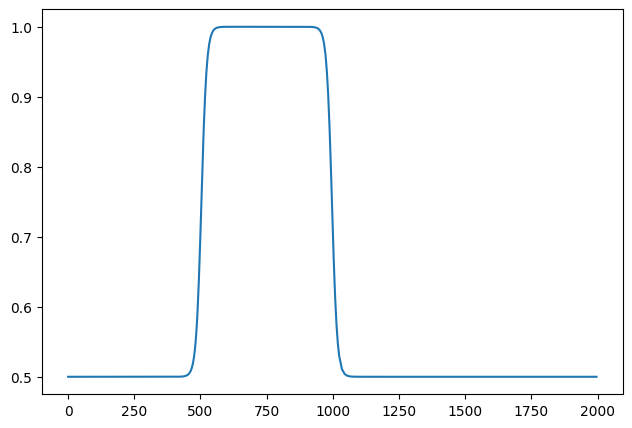

In [311]:
#simple figure
fig = plt.figure(figsize=(7.5,5))   
ax = fig.add_subplot(111)

def sigmoid1(y, x_i=500, x_f=1000, y_max=1, y_0=0, slope=0.1):
    sigm_rise =  y_0 + y_max / (1 + np.exp((x_i-xx)*slope))
    sigm_fall =  y_0 + y_max / (1 + np.exp(-(x_f-xx)*slope))
    sigm = sigm_rise*sigm_fall
    sigm = 2**sigm
    sigm = sigm/np.max(sigm)
    return y*sigm

y = np.full((len(xx)), 1)

ax.plot(xx, sigmoid1(y))

In [1]:
import numpy as np
import time

In [4]:
def measure_speed(size):
    # Generate two random matrices
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # Start the clock
    start_time = time.time()

    # Matrix multiplication
    C = np.dot(A, B)

    # Stop the clock
    end_time = time.time()

    # Compute and return the time taken
    return end_time - start_time

# Test with a 1000x1000 matrix
size = 5000
time_taken = measure_speed(size)
print(f"Time taken to multiply two {size}x{size} matrices: {time_taken} seconds")

Time taken to multiply two 5000x5000 matrices: 1.4942996501922607 seconds
